<a href="https://www.kaggle.com/code/rininobaron/final-project-eda-ibm-course?scriptVersionId=140162090" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Final Project

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm 

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 1. Brief description of the data set and a summary of its attributes

The dataset utilized for this concluding project has been sourced from Kaggle and is accessible through the provided link: https://www.kaggle.com/datasets/amirhosseinmirzaie/diamonds-price-dataset

Within this dataset resides an extensive array of diamond-centric information, encompassing a multitude of attributes that can be leveraged for the purpose of constructing a predictive pricing model. These features are described below:


| Description | Column |
| ------------ | --- |
| Diamond weight in carat | carat |
| diamond cutting quality | cut |
| diamond color from J (worst) to D (best) | color |
| A measure of diamond clarity *(from left to right is worst to best: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF)* | clarity |
| diamond length in mm | x |
| diamond width in mm | y |
| diamond depth in mm | z |
| Percentage depth that is equal to z / mean(x,y) | depth |
| The width of the widest point at the top of the diamond | table |
| diamond price | price [target variable] |



# 2. Initial plan for data exploration

To facilitate an in-depth exploration of the data, the subsequent steps have been proposed:

1. **Data Acquisition and Comprehension:**
   - Thoroughly comprehend the dataset by reading and interpreting its contents.


2. **Transformation of Categorical Variables:**
   - Convert the "cut" and "clarity" columns into ordinal representations.


3. **Statistical Analysis:**
   - Conduct a comprehensive statistical analysis of the dataset.


4. **Correlation Analysis:**
   - Investigate potential correlations between different variables.


5. **Duplicate Data Management:**
   - Address and manage any instances of duplicated data.


6. **Missing Value Treatment:**
   - Implement strategies to handle missing values within the dataset.


7. **Feature Scaling:**
   - Apply appropriate feature scaling techniques to ensure uniformity in data representation.


8. **Outlier Handling:**
   - Devise approaches to manage and mitigate the impact of outliers.


9. **Feature Engineering:**
   - Explore the creation of new features to enhance the predictive power of the model.



# 3. Actions taken for data cleaning and feature engineering

Data cleaning constitutes a pivotal phase within the data preparation process for any analysis, modeling, or decision-making endeavor encompassing data. This integral stage encompasses the identification and rectification of errors, inconsistencies, inaccuracies, and other anomalies prevalent within a dataset. Moreover, an essential facet of this process is feature engineering, which plays a paramount role in preparing the data for novel models, facilitating the creation or reduction of features to avert the pitfalls of overfitting or underfitting. In pursuit of this objective, the procedures delineated in the preceding phase are further elaborated upon.

## 1. Data Acquisition and Comprehension

During this particular step, our focus lies solely on the initial actions. We begin by reading the target file, loading the data into a Pandas dataframe, and subsequently engaging in straightforward visualization techniques. The purpose of this visualization is to gain insights into the nature of data encapsulated within each column of the dataset.

In [2]:
df = pd.read_csv("/kaggle/input/diamonds-price-dataset/diamonds.csv")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   price    50000 non-null  int64  
 7   x        50000 non-null  float64
 8   y        50000 non-null  float64
 9   z        50000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


Based on the output, our dataset comprises 50,000 instances indexed from 0 to 49,999, encompassing 9 distinct features with "price" serving as the target variable. Notably, all features and the target variable exhibit a complete absence of missing values.

## 2. Transformation of Categorical Variables

In line with the information provided by the original source, it is evident that the columns "cut" and "clarity" lend themselves readily to ordinal encoding.

### Encoding "cut" column

In [4]:
df["cut"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

Transforming thet data in this column using the folowing encoding.

{'Ideal': 4, 'Premium': 3, 'Good': 1, 'Very Good': 2, 'Fair': 0}

In [5]:
new_values = {'Ideal': 4, 'Premium': 3, 'Good': 1, 'Very Good': 2, 'Fair': 0}
df["cut"] = df["cut"].replace(new_values)

### Encoding "clarity" column

In [6]:
df["clarity"].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

Transforming thet data in this column using the folowing encoding.

{"I1": 0, "SI2": 1, "SI1": 2, "VS2": 3, "VS1": 4, "VVS2": 5, "VVS1": 6, "IF": 7}

In [7]:
new_values = {"I1": 0, "SI2": 1, "SI1": 2, "VS2": 3, "VS1": 4, "VVS2": 5, "VVS1": 6, "IF": 7}
df["clarity"] = df["clarity"].replace(new_values)

## 3. Statistical Analysis

In this stage, we generate initial statistical descriptors by utilizing the describe() method from the pandas library. These descriptors encompass the fundamental statistics of the data, referred to as "first-order statistical descriptors."

In [8]:
df.describe()

,carat,cut,clarity,depth,table,price,x,y,z
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.799444,2.902700,3.047700,61.753006,57.457830,3944.805440,5.734403,5.737956,3.541056
std,0.475173,1.116717,1.643532,1.431088,2.232092,3997.938105,1.123077,1.145579,0.707065
min,0.200000,0.000000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,2.000000,2.000000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,3.000000,3.000000,61.800000,57.000000,2410.000000,5.700000,5.710000,3.530000
75%,1.040000,4.000000,4.000000,62.500000,59.000000,5351.000000,6.540000,6.540000,4.040000
max,5.010000,4.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## 4. Correlation Analysis

We use corr() method from our pandas object in order to look for correlations between the features. The correlation performed is based in Coeficient Pearsonn Correlation that is the noramlized form of covariance, that indicates correlation between variables, when 1 is potivie correlation, -1 is negative correlation and 0 means ther is no corelation. Remember only aplies to numeric values.

In [9]:
diam_num = df.select_dtypes(include = ['float64', 'int64'])
diam_num.corr()

,carat,cut,clarity,depth,table,price,x,y,z
carat,1.000000,-0.135135,-0.352435,0.027734,0.183639,0.921804,0.975037,0.950035,0.952700
cut,-0.135135,1.000000,0.189024,-0.223898,-0.432154,-0.053537,-0.125738,-0.121335,-0.149830
clarity,-0.352435,0.189024,1.000000,-0.067329,-0.159967,-0.146941,-0.371355,-0.357226,-0.366218
depth,0.027734,-0.223898,-0.067329,1.000000,-0.293012,-0.012731,-0.025563,-0.029809,0.094337
table,0.183639,-0.432154,-0.159967,-0.293012,1.000000,0.129848,0.197198,0.185248,0.153161
price,0.921804,-0.053537,-0.146941,-0.012731,0.129848,1.000000,0.884919,0.864393,0.860963
x,0.975037,-0.125738,-0.371355,-0.025563,0.197198,0.884919,1.000000,0.972977,0.970122
y,0.950035,-0.121335,-0.357226,-0.029809,0.185248,0.864393,0.972977,1.000000,0.950030
z,0.952700,-0.149830,-0.366218,0.094337,0.153161,0.860963,0.970122,0.950030,1.000000


Currently, our focus lies in scrutinizing the correlations between the features and the output. To enhance the clarity of our analysis, we establish a threshold of 0.5. This threshold enables us to visualize the features that exhibit stronger correlations, both positive and negative, with the output.

In [10]:
diam_num_corr = diam_num.corr()["price"].drop("price")
top_features = diam_num_corr[abs(diam_num_corr) > 0.5].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
print("There is {} strongly correlated values with price:\n{}".format(len(top_features), top_features))

There is 4 strongly correlated values with price:
carat    0.921804
x        0.884919
y        0.864393
z        0.860963
Name: price, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


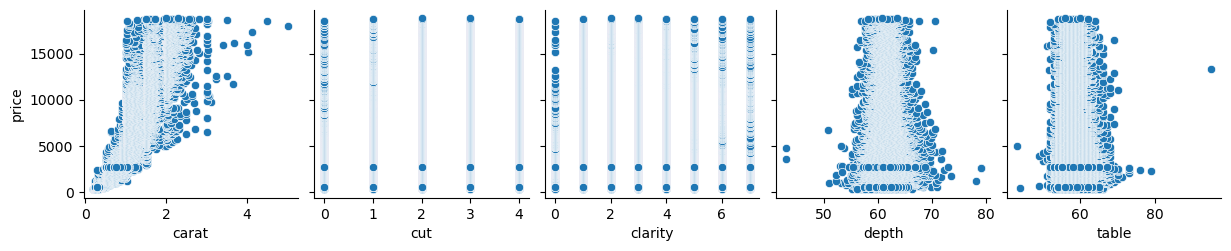

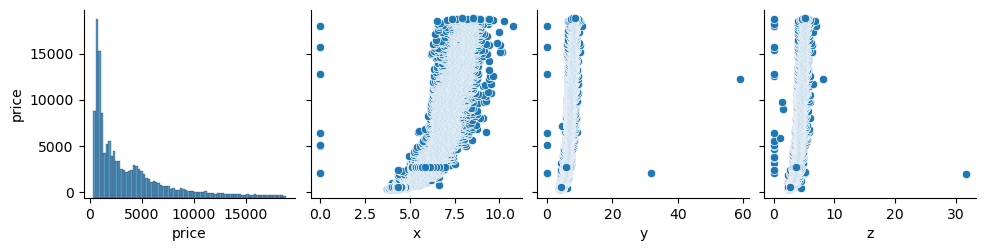

In [11]:
for i in range(0, len(diam_num.columns), 5):
    sns.pairplot(data=diam_num,
                 x_vars=diam_num.columns[i:i+5],
                 y_vars=['price'])

## 5. Duplicate Data Management

Next, we will proceed to eliminate duplicate rows from the dataset.

In [12]:
diam_num = diam_num.drop_duplicates()
diam_num.reset_index(drop=True, inplace=True)
diam_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49873 entries, 0 to 49872
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    49873 non-null  float64
 1   cut      49873 non-null  int64  
 2   clarity  49873 non-null  int64  
 3   depth    49873 non-null  float64
 4   table    49873 non-null  float64
 5   price    49873 non-null  int64  
 6   x        49873 non-null  float64
 7   y        49873 non-null  float64
 8   z        49873 non-null  float64
dtypes: float64(6), int64(3)
memory usage: 3.4 MB


## 6. Missing Value Treatment

During this phase, our objective is to identify and subsequently remove any missing values present in the dataset.

Text(0.5, 1.0, 'Total Missing Values')

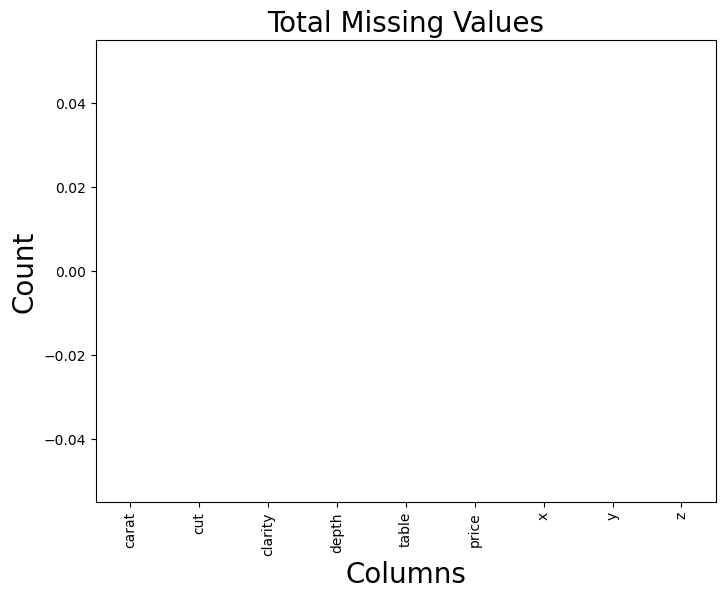

In [13]:
total = diam_num.isnull().sum().sort_values(ascending=False)
total_select = total.head(20)
total_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

Based on the outcomes presented above, we can confirm the absence of any missing values within the dataset.

## 7. Feature Scaling

For the purpose of optimizing the training process, we may consider performing scaling; however, it's important to note that this step is primarily conducted for illustrative purposes.

Furthermore, we opt to exclude the output variable "price" from our analysis, as it is deemed unnecessary for real-world scenarios.

In [14]:
scaled_data = StandardScaler().fit_transform(diam_num.drop(columns=["price"]))
scaled_data

array([[-1.19961961,  0.98315296, -1.24656007, ..., -1.58998132,
        -1.53550781, -1.57239089],
       [-1.24176024,  0.08724966, -0.6380198 , ..., -1.64344195,
        -1.65778329, -1.74221915],
       [-1.19961961, -1.70455694,  0.57906072, ..., -1.50088026,
        -1.45690215, -1.74221915],
       ...,
       [-0.20931487, -0.80865364, -0.6380198 , ..., -0.06635333,
        -0.05073414,  0.02682514],
       [ 0.12781015,  0.08724966, -1.24656007, ...,  0.37024182,
         0.33356022,  0.28156752],
       [-0.1039633 ,  0.98315296, -1.24656007, ...,  0.08511845,
         0.11521115,  0.14004398]])

## 8. Outlier Handling

We will now proceed with an outlier elimination method that relies solely on visualizing plots.

In [15]:
diam_num.columns

Index(['carat', 'cut', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')

### Box plota nad scatter plots

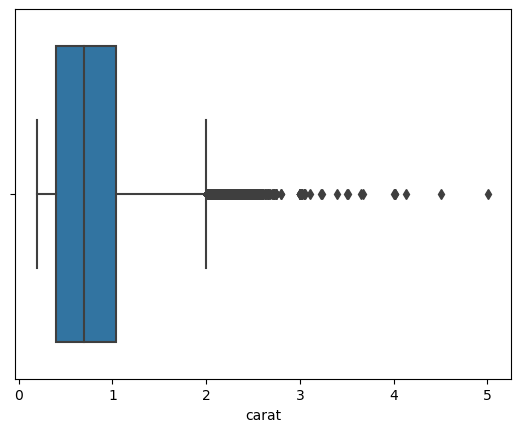

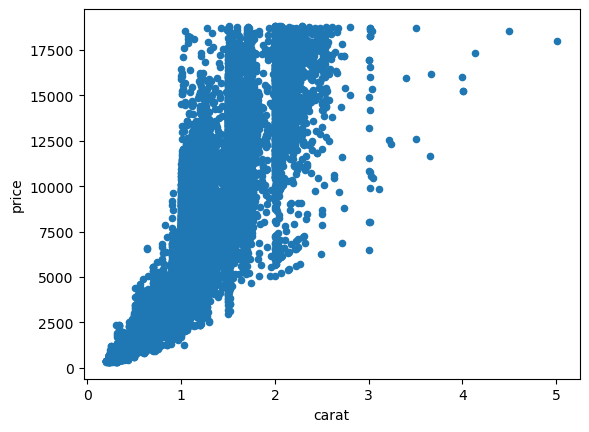

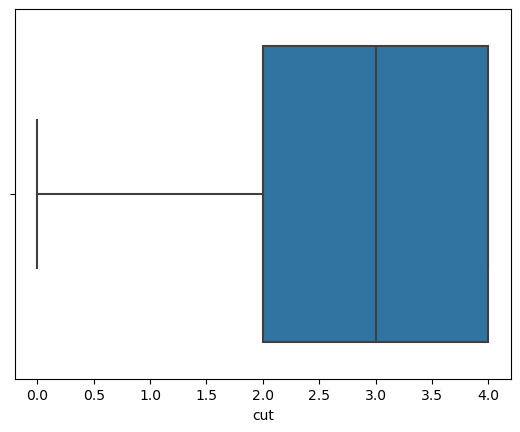

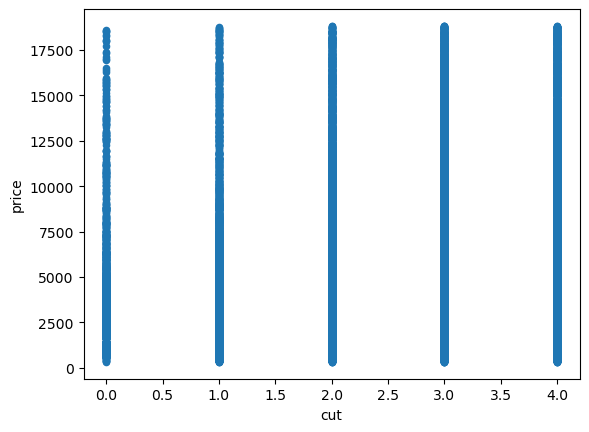

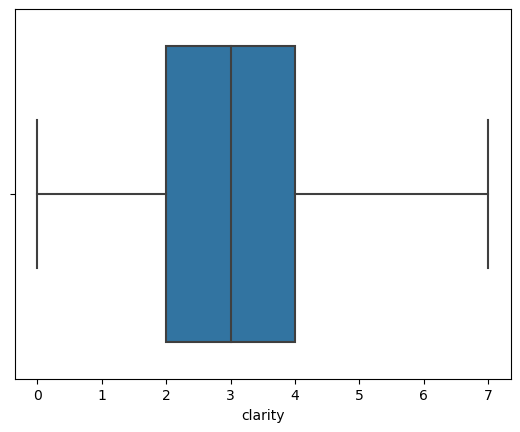

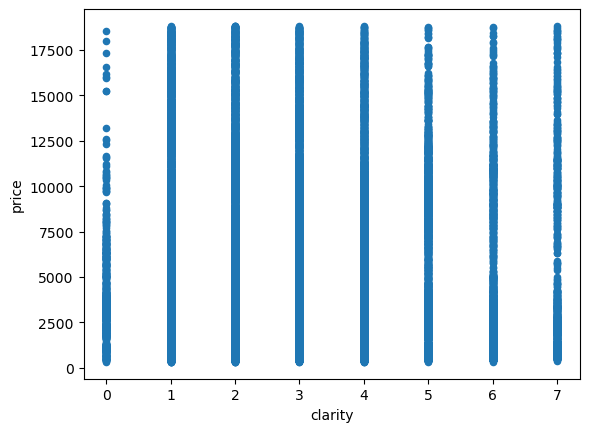

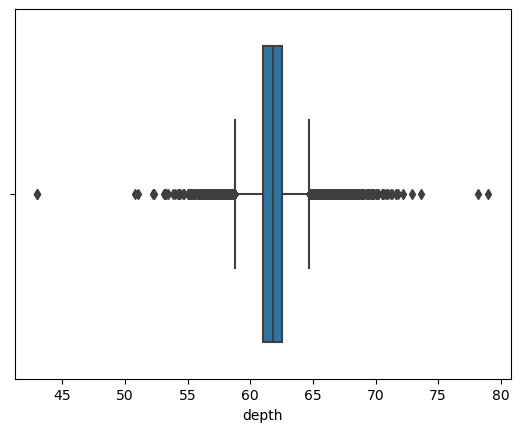

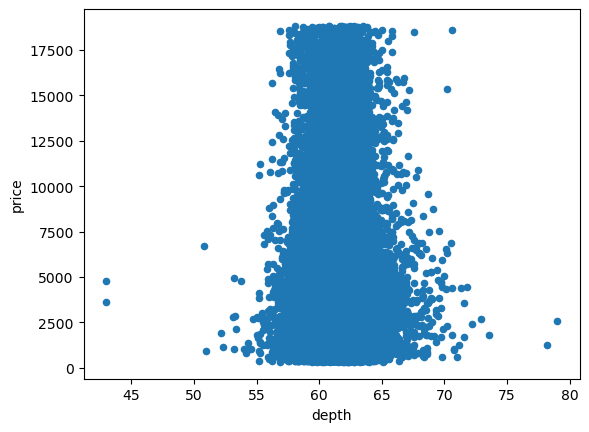

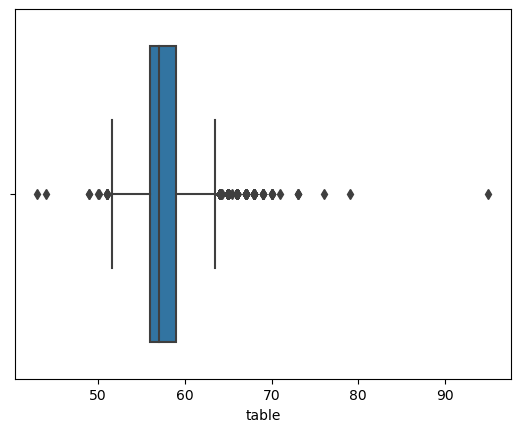

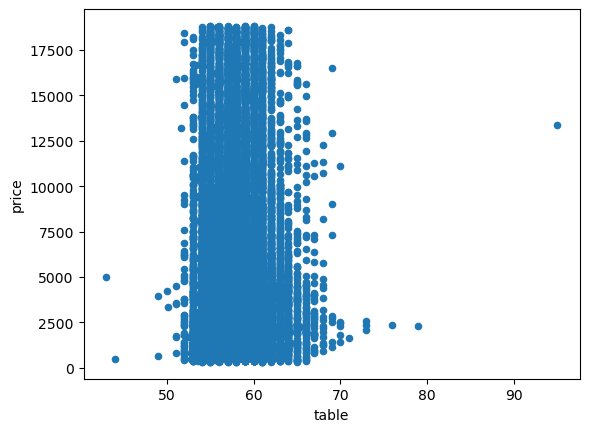

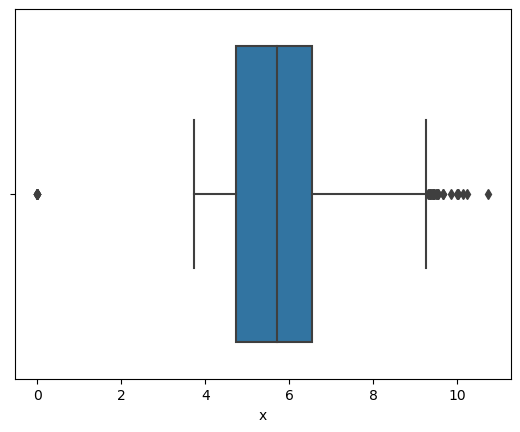

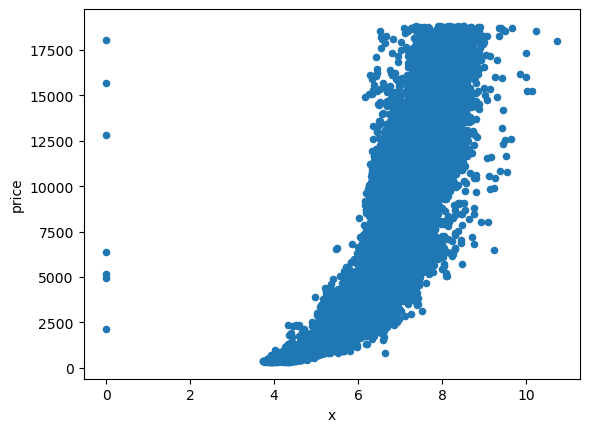

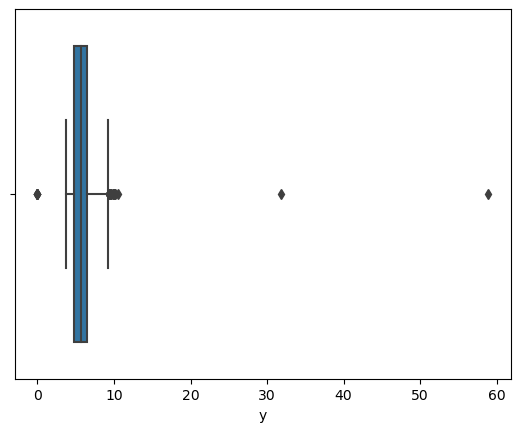

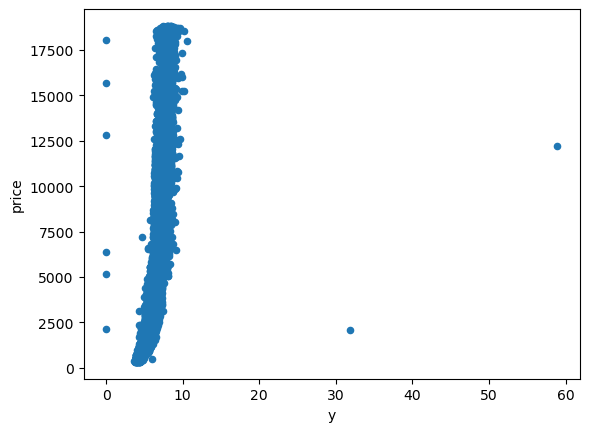

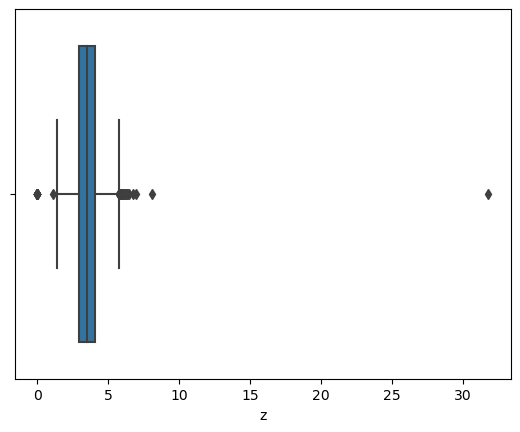

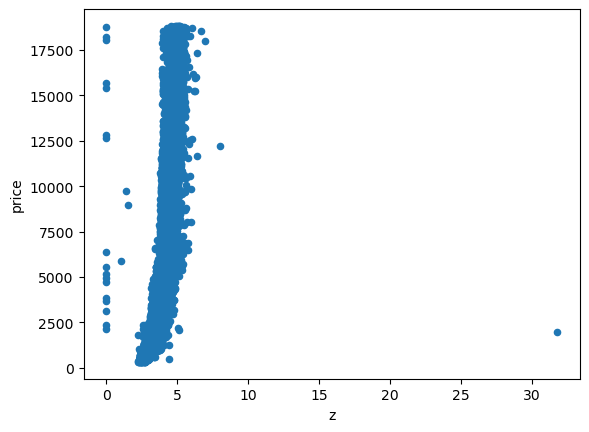

In [16]:
for column in diam_num.columns:
    if column == "price":
        continue
    sns.boxplot(x=diam_num[column])
    plt.show()
    diam_num.plot.scatter(x=column,
                      y='price')
    plt.show()

To address the outliers identified earlier, we will implement the subsequent modifications:

1. For the 'carat' feature, we will discard values greater than 4.
2. Regarding the 'depth' feature, values less than 50 and greater than 75 will be omitted.
3. Values exceeding 90 will be dropped for the 'table' feature.
4. Values below 2 for the 'x' feature will be eliminated.
5. For the 'y' feature, values surpassing 30 will be discarded.
6. Values exceeding 15 will be dropped for the 'z' feature.

In [17]:
# carat
diam_num = diam_num.where(diam_num["carat"] <= 4).dropna()

# depth
diam_num = diam_num.where((diam_num["depth"] >= 50) & (diam_num["depth"] <= 75)).dropna()

# table
diam_num = diam_num.where(diam_num["table"] <= 90).dropna()

# x
diam_num = diam_num.where(diam_num["x"] >= 2).dropna()

# y
diam_num = diam_num.where(diam_num["y"] <= 30).dropna()

# z
diam_num = diam_num.where(diam_num["z"] <= 15).dropna()

diam_num.reset_index(drop=True, inplace=True)

Now plot again in order to visually check the new distributions and scatter plots vs "price".

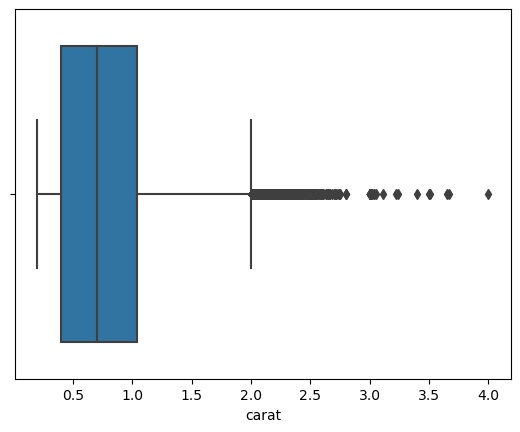

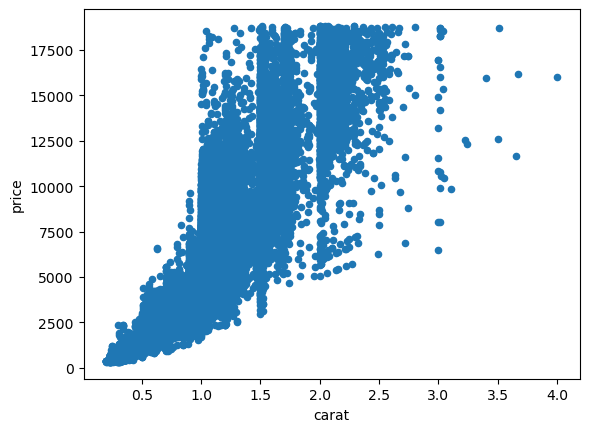

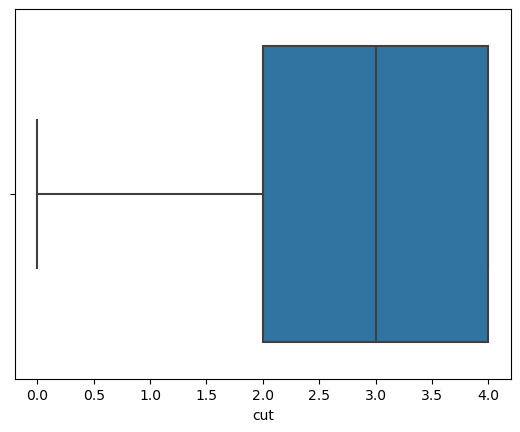

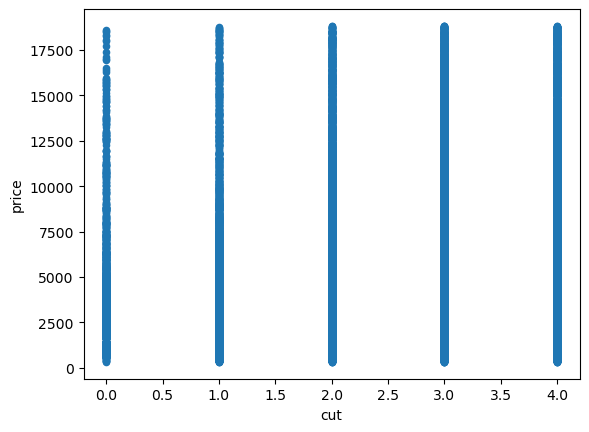

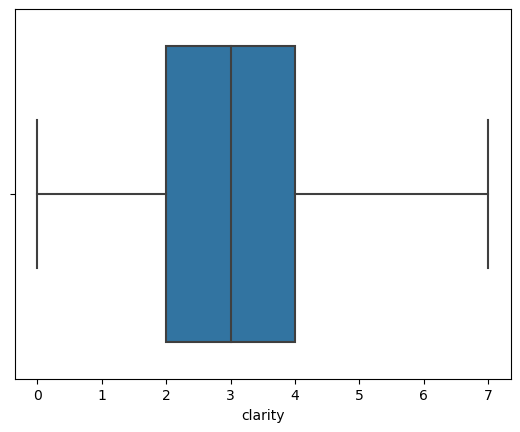

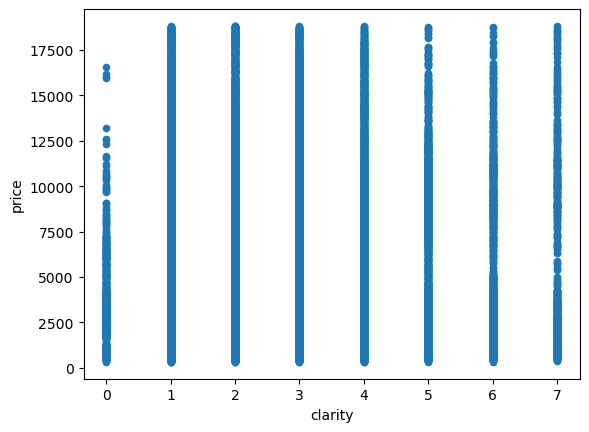

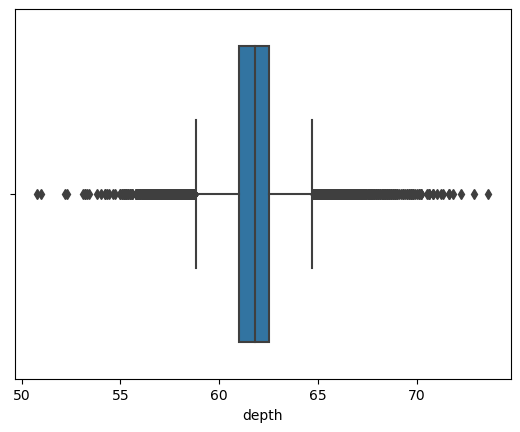

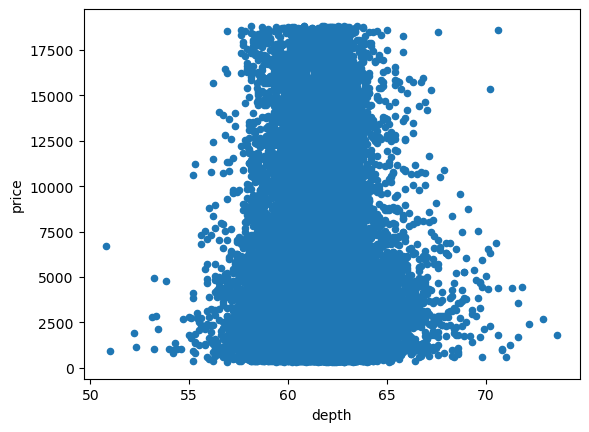

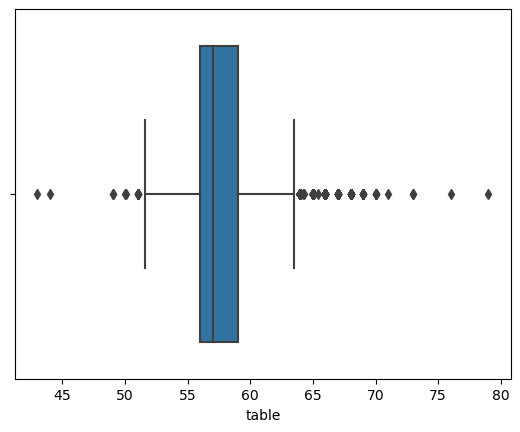

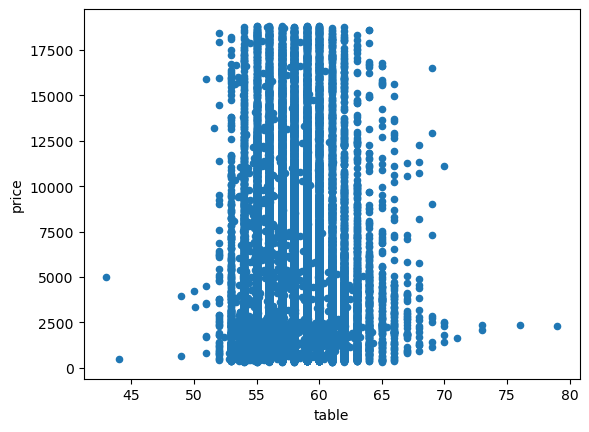

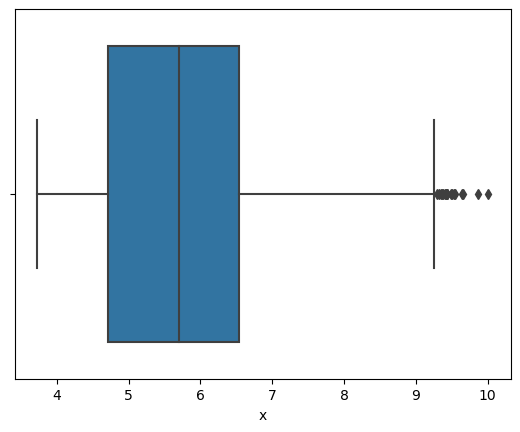

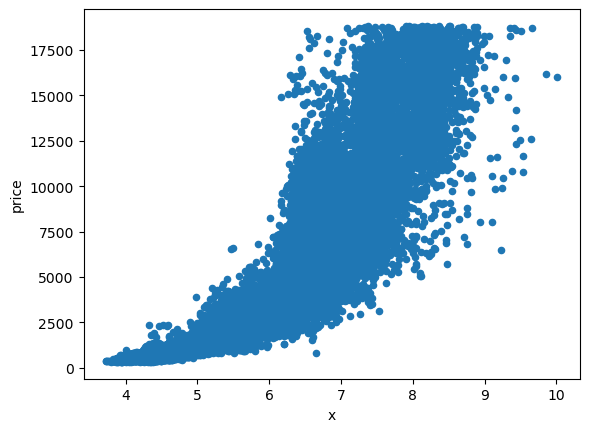

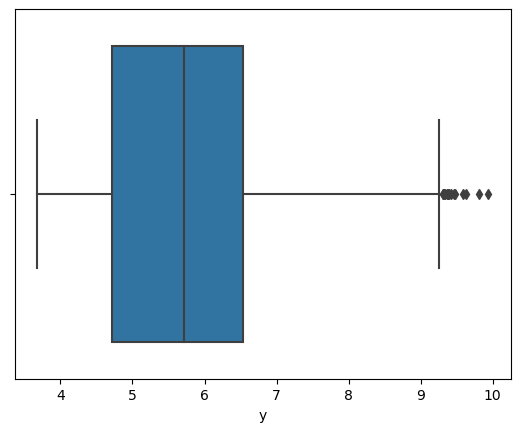

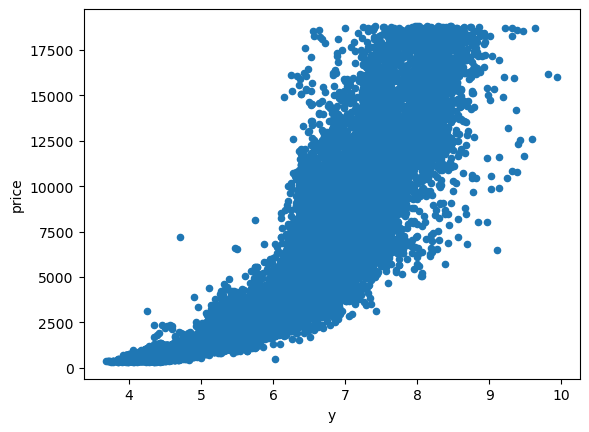

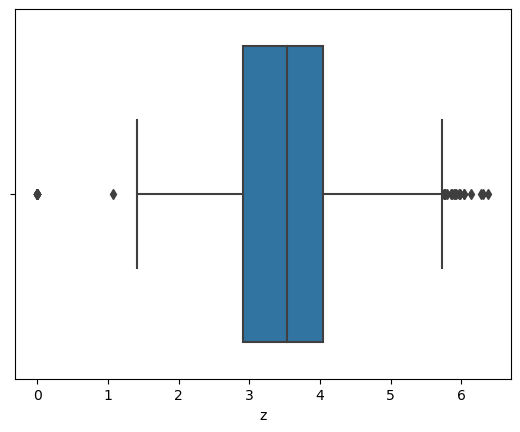

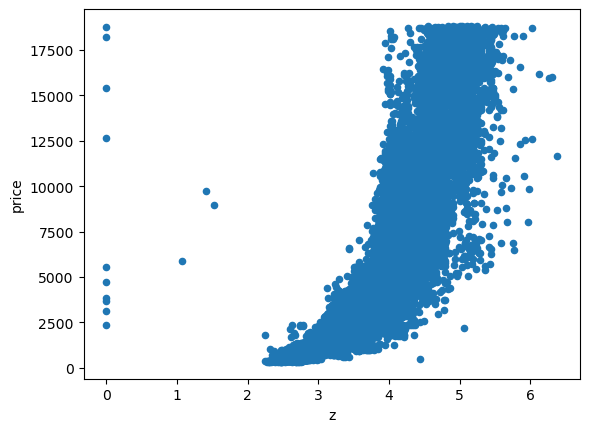

In [18]:
for column in diam_num.columns:
    if column == "price":
        continue
    sns.boxplot(x=diam_num[column])
    plt.show()
    diam_num.plot.scatter(x=column,
                      y='price')
    plt.show()

Enhancing the fit of a predictive model might involve further point exclusions, or alternatively, employing a z-score analysis to remove points beyond a specific threshold of standard deviations. However, it's important to note that these strategies fall beyond the scope of the current project.

## 9. Feature Engineering

There is a possibility that the connection between price and individual features such as carat, x, y, and z follows a quadratic pattern. To harness this potential relationship and mitigate the risk of underfitting, we will introduce quadratic features derived from these variables into our dataset.

In [19]:
diam_num['carat2'] = diam_num['carat']**2
diam_num['x2'] = diam_num['x']**2
diam_num['y2'] = diam_num['y']**2
diam_num['z2'] = diam_num['z']**2

# 4. Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner

Based on the insights gleaned from the dataset, considering a linear model such as logistic regression could prove to be a prudent choice. Four features exhibit robust linear correlations with the target variable (price). Consequently, certain characteristics, like 'cut' and 'clarity', could potentially carry redundancy and might not be essential for the ultimate construction of a predictive model.

Furthermore, the 'depth' column presents the prospect of enhancing predictive performance through a non-linear model, such as a Neural Network. However, it's important to emphasize that these considerations fall beyond the immediate scope of this project's objectives.

# 5. Formulating at least 3 hypothesis about this data

## First hypothesis

$ 𝐻_{0}:\mu_{1}-\mu_{2} = ... = \mu_8 $ The mean "table" between the "clarity" types are the same. \
$ 𝐻_{A} $ At least one of the means is not the same.

## Second hypothesis

$ 𝐻_{0}:\mu_{1}-\mu_{2} = ... = \mu_8 $ The mean price between the "clarity" types are the same. \
$ 𝐻_{A} $ At least one of the means is not the same.

## Third hypothesis

$ 𝐻_{0}:\mu_{1}-\mu_{2} = ... = \mu_5 $ The mean price between the "cut" types are the same. \
$ 𝐻_{A} $ At least one of the means is not the same.

# 6. Conducting a formal significance test for one of the hypotheses and discuss the results 

We now proceed to conduct the test for the third hypothesis.

## Third hypothesis

$ 𝐻_{0}:\mu_{1}-\mu_{2} = ... = \mu_5 $ The mean price between the "cut" types are the same. \
$ 𝐻_{A} $ At least one of the means is not the same.

In [20]:
diam_num["cut"].unique()

array([4., 3., 1., 2., 0.])

In [21]:
diam_num.groupby(["cut"])["price"].mean()

cut
0.0    4279.749831
1.0    3953.084690
2.0    3985.966851
3.0    4603.769743
4.0    3467.663061
Name: price, dtype: float64

<Axes: xlabel='cut', ylabel='price'>

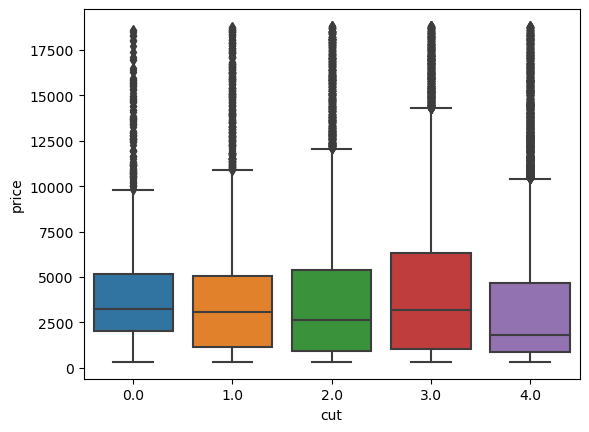

In [22]:
sns.boxplot(x="cut", y="price", data=diam_num)

Now we will construct ANOVA table

In [23]:
formula = 'price ~ C(cut)'
model = ols(formula, diam_num).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(cut),4.0,1.025225e+10,2.563063e+09,162.748058,1.153961e-138
Residual,49848.0,7.850388e+11,1.574865e+07,NaN,NaN


In conclusion, the p-value, which stands at 1.153961e-138, is considerably lower than the chosen significance level (alpha = 0.05). As a result, we reject the null hypothesis $ H_{0} $, implying that the alternative hypothesis $ H_{A} $ holds true. This leads us to infer that there is a significant difference in at least one of the means.

# 7. Suggestions for next steps in analyzing this data

We can proceed to conduct the remaining tests proposed earlier, aiming to ascertain whether the variances among distinct data strata defined by the "clarity" and "cut" columns in relation to the output target are statistically significant. The insights gained from these features could hold potential to enhance predictive capabilities.

# 8. A paragraph that summarizes the quality of this data set and a request for additional data if needed

Evidently, the data exhibits well quality, with minimal occurrences of outliers and missing values. In the event of encountering challenges such as overfitting during the model's learning process, the consideration of obtaining additional data might become pertinent. However, it's essential to clarify that addressing this potential need falls beyond the scope of the current project's objectives. For the purposes of the exploratory data analysis conducted in this notebook, the available dataset has proven to be sufficient.